In [1]:
import numpy as np
from sampler import *
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.stats as stats
from math import prod

np.random.seed(1)

def uniform(x):
    if x < 0:
        return 0
    if x > 1:
        return 0
    else:
        return 1

def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

x0 = 10
sigma = 1

def erf(x):
    if x > 0:
        return (np.exp(-(x-x0)**2/(2*sigma**2) - np.exp(-(x+x0)**2/(2*sigma**2))))/(sigma*np.sqrt(np.pi*2))/sp.erf(x0/sigma/np.sqrt(2))
    else:
        return 0

uniform_sampler = Sampler(uniform, domain=(True, 0, 1))
normal_sampler = Sampler(normal, domain=(True, -5, 5))
erf_sampler = Sampler(erf, domain=(True, 5, 15))

# Exercício 2

In [2]:
averages = []
variances = []
avg_averages = []
avg_variances = []

t = 10000

for i in range(t):
    normal_samples = normal_sampler.sample(10)
    normal_samples.set_moments()
    averages.append(normal_samples.average)
    variances.append(normal_samples.variance)
    avg_averages.append((sum(averages))/len(averages))
    avg_variances.append((sum(variances))/len(variances))

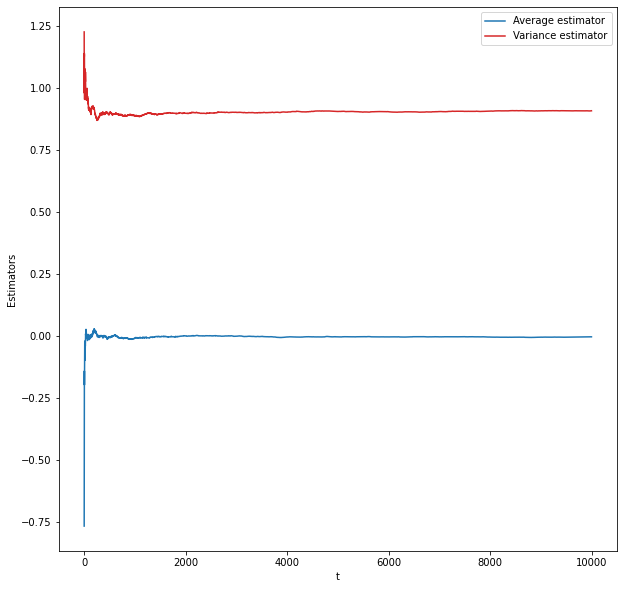

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), facecolor="white")

ax.plot(range(t), avg_averages, label='Average estimator')
ax.plot(range(t), avg_variances, label='Variance estimator', color='tab:red')
ax.set_ylabel('Estimators')
ax.set_xlabel('t')
ax.legend()

We can see that the variance estimator is clearly biased.